<a href="https://colab.research.google.com/github/marisabelsubia/Programmazione-Avanzata-2025/blob/main/Plotting_%26_Running_guide_Pythia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting and Running guide - Pythia
### Author: Maria Isabel Subia

This Colab Notebook showcases the main functionalities and results of the Pythia project. The README file found on the project folder contains further technical details.

About the project:
* Simulate with PYTHIA **100000** events of: **photon-photon collisions at 100 GeV, 100 GeV photon on proton target, 100 GeV photon on lead ion target**

 * decide carefully what kind of events to simulate with Pythia (SoftQCD or HardQCD, various parameters for photon generation)
* Analyze the data produced with Monte Carlo truth
 * compare the transverse momentum distribution of the particles produced in the three cases. *The data analysis must be done with Python*




##SUMMARY OF DETAILS
>.sh script to run pythia on the machine to be run as ./loadpythia.sh

> **Modular design**

 > * runSimulation: function that opens
  file, run simulation (in general for any collision type), writes output info with final-charged counts, and prints progress/statistics
 > Collisions setup
 > * simulatePhotonPhoton: reads the corresponding .cmnd file ("photon-photon.cmnd"). Same for PhotonProton and PhotonLead

>Other parameters that can be implemented in the simulation (are not included for simplicity)

    > Photon-Photon Collisions: Photon:ProcessType

    > Photon-lead: enable and modify nuclear effects with HeavyIon:mode

> **Plotting choices**

>We plot normalized distribution dN/dpT using hpl, then exporting a .dat including solely charged final states (a previous version of the project flagged final and charged particles but the filtering rendered the plotting process unnecesarily long)

> **Some comments on particle beam design**

>Soft QCD for low momentum transfer, while Hard QCD for large momentum transfer

>softQCD shall not be used at the same time with hardQCD

>Higher particle multiplicity in photon-lead collisions is expected


>Photons can be either resolved or act as point-like particles (direct). Therefore for a photon-photon interaction there are four different contributions, resolved-resolved, resolved-direct, direct-resolved and direct-direct.


### Import modules and Mount Google Drive (Run once when starting)

In [11]:
from matplotlib import pyplot as plt
#from matplotlib.backends.backend_pdf import PdfPages
import os
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

# Setting paths for our result files
# Two column output automatically created through Histplot
data_dir = '/content/drive/My Drive/PythiaOutput'
photon_photon_file_hpl = os.path.join(data_dir, 'pTdistribution-0.dat')
photon_proton_file_hpl = os.path.join(data_dir, 'pTdistribution-1.dat')
photon_lead_file_hpl = os.path.join(data_dir, 'pTdistribution-2.dat')

# event_id,particle_id,px,py,pz,e,m,pt,eta,phi
photon_photon_file = os.path.join(data_dir, 'photon_photon_events.txt')
photon_proton_file = os.path.join(data_dir, 'photon_proton_events.txt')
photon_lead_file = os.path.join(data_dir, 'photon_lead_events.txt')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Matplotlib output formatted histogram generated on Pythia

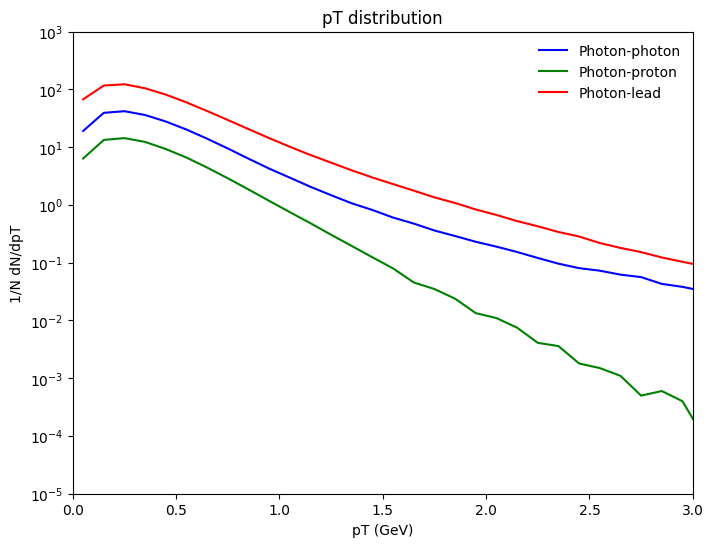

In [12]:
#@title { vertical-output: true}

#pp   = PdfPages('pTdistribution.pdf')
tmp1 = plt.figure(1)
tmp1.set_size_inches(8.00,6.00)
plot = open(photon_photon_file_hpl)
plot = [line.split() for line in plot]
valx = [float(x[0]) for x in plot]
valy = [float(x[1]) for x in plot]
plt.plot( valx, valy, 'b-', label=r'Photon-photon')
plot = open(photon_proton_file_hpl)
plot = [line.split() for line in plot]
valx = [float(x[0]) for x in plot]
valy = [float(x[1]) for x in plot]
plt.plot( valx, valy, 'g-', label=r'Photon-proton')
plot = open(photon_lead_file_hpl)
plot = [line.split() for line in plot]
valx = [float(x[0]) for x in plot]
valy = [float(x[1]) for x in plot]
plt.plot( valx, valy, 'r-', label=r'Photon-lead')
plt.xlim( 0.000e+00, 3)
#plt.yscale("log")
plt.ylim( 10.000e-06, 10.000e+02)

plt.yscale('symlog', linthresh=1.17e-11)
plt.legend(frameon=False,loc='best')
plt.title(r'pT distribution')
plt.xlabel(r'pT (GeV)')
plt.ylabel(r'1/N dN/dpT')
plt.show()
#pp.savefig(tmp1,bbox_inches='tight')
#plt.clf()
#pp.close()

### Terminal print of global statistics



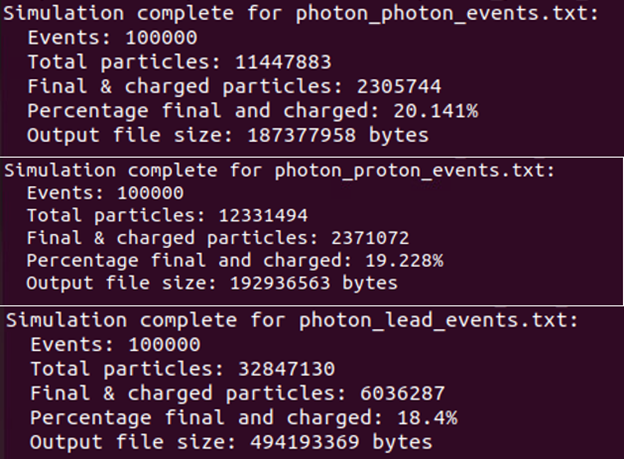

### Histogram plotting with Python

Loading /content/drive/My Drive/PythiaOutput/photon_photon_events.txt...
Loaded 2305744 total particles
Loading /content/drive/My Drive/PythiaOutput/photon_proton_events.txt...
Loaded 748822 total particles
Loading /content/drive/My Drive/PythiaOutput/photon_lead_events.txt...
Loaded 7015326 total particles

Basic pT Statistics for Final State Particles:

Photon-Photon:
  Number of final state particles: 2305744
  Mean pT: 0.4161 GeV
  Median pT: 0.3382 GeV
  Min pT: 0.0001 GeV
  Max pT: 14.6882 GeV

Photon-Proton:
  Number of final state particles: 748822
  Mean pT: 0.3793 GeV
  Median pT: 0.3250 GeV
  Min pT: 0.0001 GeV
  Max pT: 3.8587 GeV

Photon-Lead:
  Number of final state particles: 7015326
  Mean pT: 0.4214 GeV
  Median pT: 0.3385 GeV
  Min pT: 0.0000 GeV
  Max pT: 14.1194 GeV

Saved plot: pt_comparison_counts.png


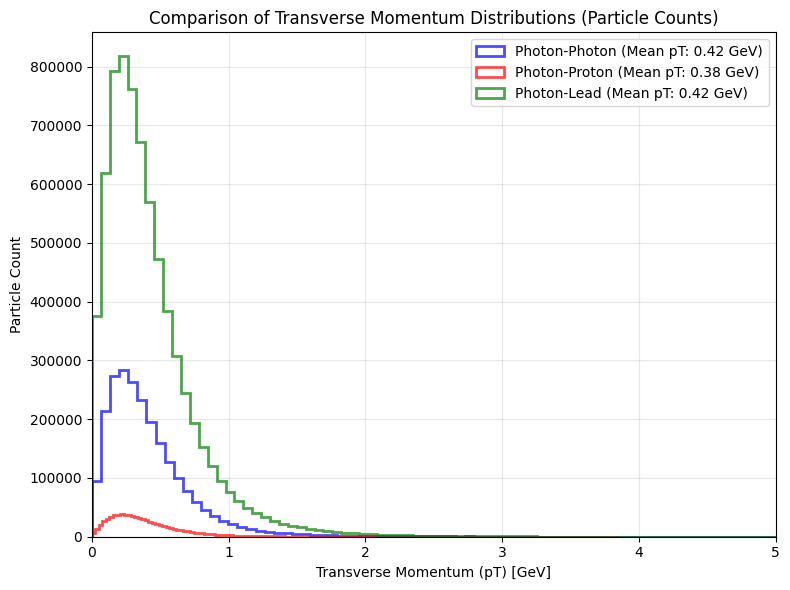

In [13]:
#@title { vertical-output: true}

# Dictionary that links collision types to file paths
files = {"Photon-Photon": photon_photon_file, "Photon-Proton": photon_proton_file, "Photon-Lead": photon_lead_file}

# Colors for plotting
colors = {"Photon-Photon": "blue", "Photon-Proton": "red", "Photon-Lead": "green"}

#data loading function
def load_file(filename, collision_type):
    print(f"Loading {filename}...") #string formatting to print filename

    if not os.path.exists(filename):
        print(f"ERROR: File {filename} not found!")
        return None

    try: # Exception handling with try-except

        # Load the data
        df = pd.read_csv(filename)
        print(f"Loaded {len(df)} total particles")
        df['collision_type'] = collision_type #new column for each 3 collision

        return df

    except Exception as e:
        print(f"ERROR loading {filename}: {e}")
        return None

# Load all data files
dataframes = {} #Dictionary of dataframes
for collision_type, filename in files.items(): #unpacking keys as pairs
    df = load_file(filename, collision_type) #using my data loading function
    if df is not None:
        dataframes[collision_type] = df #adds elements to my dictionary

# Check if we loaded any data
if not dataframes:
    print("ERROR: No data loaded. Cannot create plots.")
    exit(1)

# Print basic statistics for each collision type
print("\nBasic pT Statistics for Final State Particles:")
for collision_type, df in dataframes.items():
    print(f"\n{collision_type}:")
    print(f"  Number of final state particles: {len(df)}")
    print(f"  Mean pT: {df['pt'].mean():.4f} GeV")
    print(f"  Median pT: {df['pt'].median():.4f} GeV")
    print(f"  Min pT: {df['pt'].min():.4f} GeV")
    print(f"  Max pT: {df['pt'].max():.4f} GeV")

# Plot pT distributions (raw counts)
plt.figure(figsize=(8, 6))

for collision_type, df in dataframes.items():
    # Get pT values below 10 GeV
    pt_values = df[df['pt'] < 10]['pt']

    # Plot histogram (without density=True)
    plt.hist(pt_values, bins=150, alpha=0.7,
             histtype='step', linewidth=2, color=colors[collision_type],
             label=f"{collision_type} (Mean pT: {pt_values.mean():.2f} GeV)")

plt.xlabel("Transverse Momentum (pT) [GeV]")
plt.ylabel("Particle Count")
plt.title("Comparison of Transverse Momentum Distributions (Particle Counts)")
plt.xlim(0,5)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("pt_comparison_counts.png")  # Saving file
print("\nSaved plot: pt_comparison_counts.png")



Saved plot: pt_comparison_log_counts.png


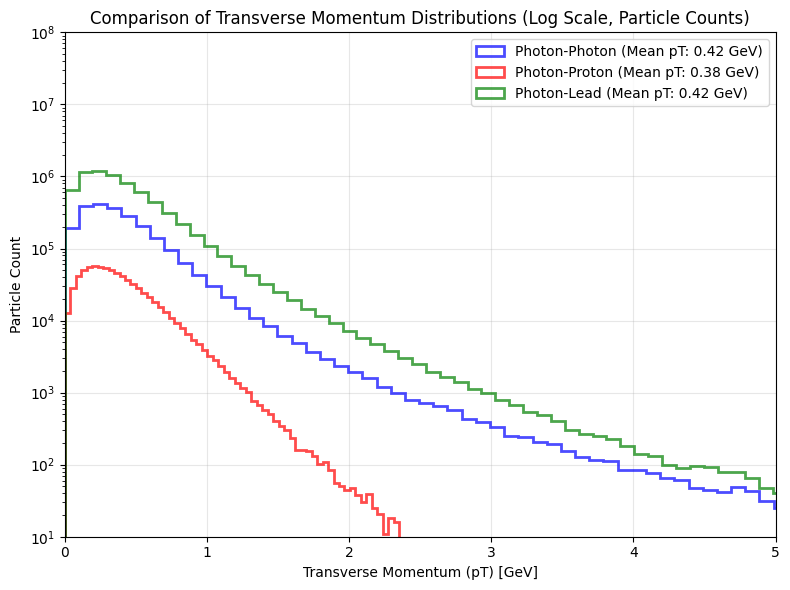

In [14]:
#@title { vertical-output: true}

# Create log scale plot (raw counts)
plt.figure(figsize=(8, 6))

for collision_type, df in dataframes.items():
    pt_values = df[df['pt'] < 10]['pt']
    plt.hist(pt_values, bins=100, alpha=0.7,
             histtype='step', linewidth=2, color=colors[collision_type],
             label=f"{collision_type} (Mean pT: {pt_values.mean():.2f} GeV)")

plt.xlabel("Transverse Momentum (pT) [GeV]")
plt.ylabel("Particle Count")
plt.title("Comparison of Transverse Momentum Distributions (Log Scale, Particle Counts)")
plt.legend()
plt.grid(alpha=0.3)
plt.yscale('log')
plt.xlim(0,5)
plt.ylim(10,10e7)
plt.tight_layout()
plt.savefig("pt_comparison_log_counts.png")  # Changed filename
print("Saved plot: pt_comparison_log_counts.png")


Saved plot: pt_vs_eta_comparison.png


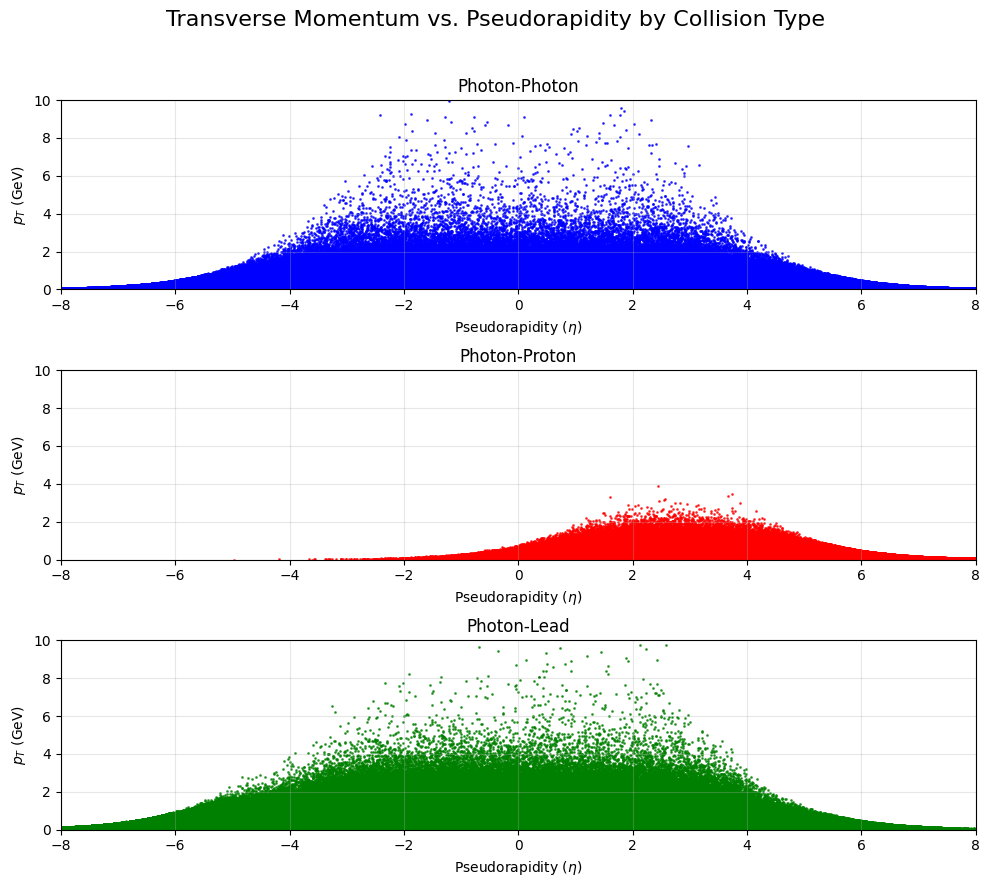

In [15]:
#@title { vertical-output: true}

# Create a single figure with 3 subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 9), sharey=True)

# Plot each collision type in its own subplot
for i, (collision_type, df) in enumerate(dataframes.items()):
    # Set reasonable data range
    filtered_df = df[(df['pt'] < 10) & (df['eta'] > -10) & (df['eta'] < 10)]

    # Create scatter plot on the corresponding subplot
    axs[i].scatter(filtered_df['eta'], filtered_df['pt'], s=1, color=colors[collision_type], alpha=0.7)

    # Add labels and title for each subplot
    axs[i].set_ylabel('$p_T$ (GeV)' )
    axs[i].set_xlabel('Pseudorapidity ($\eta$)')
    axs[i].set_title(f'{collision_type}')
    axs[i].grid(alpha=0.3)

    # Set consistent y-axis limits
    axs[i].set_ylim(0, 10)
    axs[i].set_xlim(-8, 8)

# Main title
fig.suptitle('Transverse Momentum vs. Pseudorapidity by Collision Type', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.88)

# Save the figure
plt.savefig("pt_vs_eta_comparison.png", dpi=300)
print("\nSaved plot: pt_vs_eta_comparison.png")

# Show the plot
plt.show()